# Understanding Pandas Series and DataFrames - Lab

# Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Practice

## Objectives
You will be able to:
* Understand and explain what Pandas Series and DataFrames are and how they differ from dictionaries and lists
* Create Series & DataFrames from dictionaries and lists
* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

# Rename all the columns to lower case

In [32]:
#Your code here
print(df.columns)
rename = []
for col in df.columns:
    rename.append(col.lower())
print(rename)

df.columns = rename
df.head()

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')
['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time', 'desc', 'entries', 'exits                                                               ']


,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Change the Index to be the Line Names

In [33]:
#Your code here
df = df.set_index('linename')
df.head()

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Painstakingly change the index back

In [34]:
# Your code here
df.reset_index(inplace = True)
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order.

In [39]:
# Your code here
# Grouping by station and linename - unique
lines = df.groupby('station')['linename'].nunique()
lines
# index needs to be the same for dataframe and new column, change df index to station


station
1 AV               1
103 ST             3
103 ST-CORONA      1
104 ST             2
110 ST             1
111 ST             3
116 ST             3
116 ST-COLUMBIA    1
121 ST             1
125 ST             4
135 ST             2
137 ST CITY COL    1
138/GRAND CONC     1
14 ST              3
14 ST-UNION SQ     2
145 ST             2
149/GRAND CONC     1
14TH STREET        1
15 ST-PROSPECT     1
155 ST             2
157 ST             1
161/YANKEE STAD    2
167 ST             2
168 ST             2
169 ST             1
170 ST             2
174 ST             1
175 ST             1
176 ST             1
18 AV              3
                  ..
SUTPHIN-ARCHER     1
SUTTER AV          1
SUTTER AV-RUTLD    1
THIRTY ST          1
THIRTY THIRD ST    1
TIMES SQ-42 ST     3
TOMPKINSVILLE      1
TREMONT AV         1
TWENTY THIRD ST    1
UNION ST           1
UTICA AV           1
V.CORTLANDT PK     1
VAN SICLEN AV      2
VAN SICLEN AVE     1
VERNON-JACKSON     1
W 4 ST-WASH SQ     1
W 8 S

In [40]:
# df.set_index('station', inplace = True)
# df.head()
# add new column
df['Num_Lines'] = lines
df.head()

,linename,c/a,unit,scp,division,date,time,desc,entries,exits,Num_Lines
station,,,,,,,,,,,
59 ST,NQR456W,A002,R051,02-00-00,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,3
59 ST,NQR456W,A002,R051,02-00-00,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,3
59 ST,NQR456W,A002,R051,02-00-00,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229,3
59 ST,NQR456W,A002,R051,02-00-00,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314,3
59 ST,NQR456W,A002,R051,02-00-00,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384,3


## Write a function to clean a column name.

In [41]:
def clean(col_name):
    cleaned = col_name.strip()
    #Your code here; whatever you want to do to col_name. Hint: think back to str methods.
    return cleaned

In [42]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [43]:
#Checking the output, we can see the results.
df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'division', 'date', 'time', 'desc',
       'entries', 'exits', 'Num_Lines'],
      dtype='object')

## Compare subway traffic by day of the week. Display this as a graph.

In [48]:
#Your code here

#Your code here
df['date'] = pd.to_datetime(df['date'])
df.dtypes

linename             object
c/a                  object
unit                 object
scp                  object
division             object
date         datetime64[ns]
time                 object
desc                 object
entries               int64
exits                 int64
Num_Lines             int64
dtype: object

In [50]:
df['day_of_week'] = df['date'].dt.day_name()
df.head()

,linename,c/a,unit,scp,division,date,time,desc,entries,exits,Num_Lines,day_of_week
station,,,,,,,,,,,,
59 ST,NQR456W,A002,R051,02-00-00,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,3,Saturday
59 ST,NQR456W,A002,R051,02-00-00,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,3,Saturday
59 ST,NQR456W,A002,R051,02-00-00,BMT,2018-08-25,08:00:00,REGULAR,6736105,2283229,3,Saturday
59 ST,NQR456W,A002,R051,02-00-00,BMT,2018-08-25,12:00:00,REGULAR,6736180,2283314,3,Saturday
59 ST,NQR456W,A002,R051,02-00-00,BMT,2018-08-25,16:00:00,REGULAR,6736349,2283384,3,Saturday


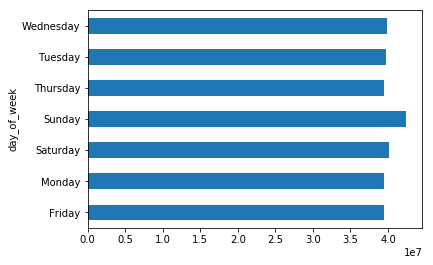

In [53]:
df.groupby('day_of_week')['entries'].mean().plot(kind = 'barh')

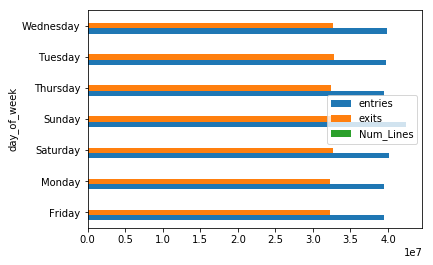

In [65]:
df.groupby('day_of_week').mean().plot(kind = 'barh')

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

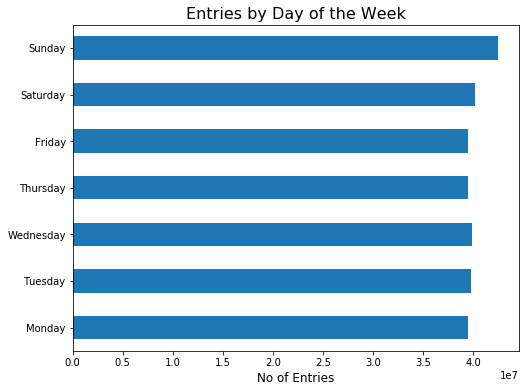

In [64]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df.groupby('day_of_week')['entries'].mean().loc[day_order].plot(kind = 'barh', figsize = (8, 6))
plt.ylabel('')
plt.xlabel('No of Entries', fontsize = 12) 
plt.title('Entries by Day of the Week', fontsize =16)
plt.tight_layout

## Is there more subway traffic on a weekend or a weekday?    Be specific in comparing magnitudes.

In [68]:
#Your code here
def is_weekend(col):
    if (col == 'Saturday') or (col == 'Sunday'):
        return 1
    else:
        return 0
    

In [69]:
df['weekend'] = df['day_of_week'].map(is_weekend)
df.head()

,linename,c/a,unit,scp,division,date,time,desc,entries,exits,Num_Lines,day_of_week,weekend
station,,,,,,,,,,,,,
59 ST,NQR456W,A002,R051,02-00-00,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,3,Saturday,1
59 ST,NQR456W,A002,R051,02-00-00,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,3,Saturday,1
59 ST,NQR456W,A002,R051,02-00-00,BMT,2018-08-25,08:00:00,REGULAR,6736105,2283229,3,Saturday,1
59 ST,NQR456W,A002,R051,02-00-00,BMT,2018-08-25,12:00:00,REGULAR,6736180,2283314,3,Saturday,1
59 ST,NQR456W,A002,R051,02-00-00,BMT,2018-08-25,16:00:00,REGULAR,6736349,2283384,3,Saturday,1


In [70]:
df.groupby('weekend').mean()

,entries,exits,Num_Lines
weekend,,,
0,3.959848e+07,3.246148e+07,1.593792
1,4.132588e+07,3.345448e+07,1.591964


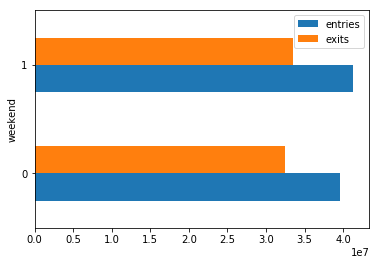

In [76]:
df.groupby('weekend')['entries', 'exits'].mean().plot(kind = 'barh')

# Drop a couple of columns

In [77]:
# Your code here
df.drop(['c/a', 'scp'], axis = 1, inplace = True)
df.head()

,linename,unit,division,date,time,desc,entries,exits,Num_Lines,day_of_week,weekend
station,,,,,,,,,,,
59 ST,NQR456W,R051,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,3,Saturday,1
59 ST,NQR456W,R051,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,3,Saturday,1
59 ST,NQR456W,R051,BMT,2018-08-25,08:00:00,REGULAR,6736105,2283229,3,Saturday,1
59 ST,NQR456W,R051,BMT,2018-08-25,12:00:00,REGULAR,6736180,2283314,3,Saturday,1
59 ST,NQR456W,R051,BMT,2018-08-25,16:00:00,REGULAR,6736349,2283384,3,Saturday,1
